<a href="https://colab.research.google.com/github/Z0rrill0/VisionArtificial/blob/main/TENDENCIA-EVA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
load = files.upload()


Saving base_de_datos_ventas.csv to base_de_datos_ventas.csv


In [2]:
# Cargar el archivo CSV
import pandas as pd

# Asegúrate de usar el nombre correcto del archivo que subiste
data = pd.read_csv('base_de_datos_ventas.csv')

# Mostrar las primeras filas para verificar que se cargaron correctamente
data.head()


,Pais,Plataforma,Genero,Ventas,Fecha
0,Argentina,Xbox,Estrategia,5642.331256,2023-01-01
1,Chile,Switch,Estrategia,53369.785841,2023-01-08
2,Estados Unidos,Xbox,Deporte,54293.194600,2023-01-15
3,Argentina,PC,Accion,63924.275199,2023-01-22
4,Argentina,Switch,Estrategia,72746.087705,2023-01-29


In [3]:
# Eliminar filas con valores nulos
data.dropna(inplace=True)

# Codificar las variables categóricas con One-Hot Encoding
data = pd.get_dummies(data, columns=['Genero', 'Plataforma', 'Pais'], drop_first=True)

# Verificar las primeras filas del DataFrame procesado
data.head()


,Ventas,Fecha,Genero_Aventura,Genero_Deporte,Genero_Estrategia,Plataforma_PS4,Plataforma_Switch,Plataforma_Xbox,Pais_Chile,Pais_Estados Unidos,Pais_Mexico
0,5642.331256,2023-01-01,False,False,True,False,False,True,False,False,False
1,53369.785841,2023-01-08,False,False,True,False,True,False,True,False,False
2,54293.194600,2023-01-15,False,True,False,False,False,True,False,True,False
3,63924.275199,2023-01-22,False,False,False,False,False,False,False,False,False
4,72746.087705,2023-01-29,False,False,True,False,True,False,False,False,False


In [7]:
# Verifica los tipos de datos de cada columna
print(data.dtypes)


Ventas                 float64
Fecha                    int64
Genero_Aventura           bool
Genero_Deporte            bool
Genero_Estrategia         bool
Plataforma_PS4            bool
Plataforma_Switch         bool
Plataforma_Xbox           bool
Pais_Chile                bool
Pais_Estados Unidos       bool
Pais_Mexico               bool
dtype: object


In [6]:
# Convertir la columna de fecha a un valor numérico (días desde la fecha mínima)
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Fecha'] = (data['Fecha'] - data['Fecha'].min()).dt.days


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir las características (X) y la variable objetivo (y)
X = data.drop('Ventas', axis=1)  # Todas las columnas excepto 'Ventas'
y = data['Ventas']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el MAE, MSE y R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print(f'MAE (Error Absoluto Medio): {mae}')
print(f'MSE (Error Cuadrático Medio): {mse}')
print(f'R² (Coeficiente de Determinación): {r2}')


MAE (Error Absoluto Medio): 25905.982032391777
MSE (Error Cuadrático Medio): 936726356.7111747
R² (Coeficiente de Determinación): -0.20386719340842507


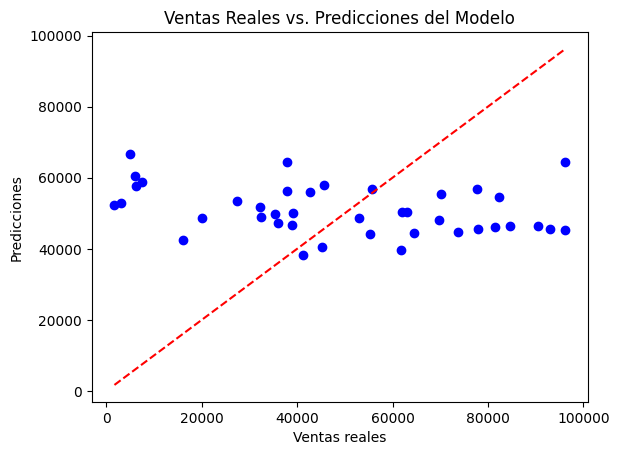

In [9]:
# Graficar las predicciones vs los valores reales con línea de referencia y=x
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia y=x
plt.xlabel("Ventas reales")
plt.ylabel("Predicciones")
plt.title("Ventas Reales vs. Predicciones del Modelo")
plt.show()
